## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
raw_data = pd.read_csv("laurel_gen_data.csv")

In [3]:
raw_data.head()

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
0,14/09/19 16:00,0.0,72.3,0%,0.00,12.05
1,14/09/19 16:20,4.9,48.9,9%,0.82,8.14
2,14/09/19 16:30,10.0,32.3,24%,1.66,5.38
3,14/09/19 16:40,10.1,20.7,33%,1.69,3.44
4,14/09/19 16:50,7.4,31.6,19%,1.23,5.27


In [4]:
raw_data.tail()

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
51936,21/09/20 16:20,27.9,19.1,59%,4.64,3.18
51937,21/09/20 16:30,18.6,27.6,40%,3.11,4.60
51938,21/09/20 16:40,20.2,25.6,44%,3.37,4.27
51939,21/09/20 16:50,15.8,25.0,39%,2.63,4.17
51940,21/09/20 17:00,7.4,36.1,17%,1.24,6.02


In [5]:
raw_data.describe(include="all")

,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
count,51941,51941.000000,51941.000000,51941,51941.000000,51941.000000
unique,51941,NaN,NaN,102,NaN,NaN
top,14/09/19 16:00,NaN,NaN,0%,NaN,NaN
freq,1,NaN,NaN,27051,NaN,NaN
mean,NaN,20.782788,40.033217,NaN,3.463815,6.672215
std,NaN,33.244585,29.794417,NaN,5.540752,4.965769
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,23.400000,NaN,0.000000,3.890000
50%,NaN,0.000000,31.700000,NaN,0.000000,5.280000
75%,NaN,32.800000,45.800000,NaN,5.460000,7.630000


There's a total of 51941 records from 14/09/2019 to 21/09/2020. No missing data in the fields. 

In [6]:
raw_data.dtypes

timestamp              object
Sum of P kW solar     float64
Sum of P kW KPLC      float64
solar share            object
Solar Energy (kWh)    float64
Grid Energy (kWh)     float64
dtype: object

In [7]:
raw_data['timestamp'] = pd.to_datetime(raw_data['timestamp'].values, dayfirst = True)

In [8]:
raw_data.dtypes

timestamp             datetime64[ns]
Sum of P kW solar            float64
Sum of P kW KPLC             float64
solar share                   object
Solar Energy (kWh)           float64
Grid Energy (kWh)            float64
dtype: object

In [9]:
raw_data.describe(include ="all")

C:\Users\Anarchy\AppData\Local\Temp/ipykernel_11564/799208333.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data.describe(include ="all")


,timestamp,Sum of P kW solar,Sum of P kW KPLC,solar share,Solar Energy (kWh),Grid Energy (kWh)
count,51941,51941.000000,51941.000000,51941,51941.000000,51941.000000
unique,51941,NaN,NaN,102,NaN,NaN
top,2019-09-14 16:00:00,NaN,NaN,0%,NaN,NaN
freq,1,NaN,NaN,27051,NaN,NaN
first,2019-09-14 16:00:00,NaN,NaN,NaN,NaN,NaN
last,2020-09-21 17:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.782788,40.033217,NaN,3.463815,6.672215
std,NaN,33.244585,29.794417,NaN,5.540752,4.965769
min,NaN,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,0.000000,23.400000,NaN,0.000000,3.890000


## Data Visualization

C:\Users\Anarchy\AppData\Local\Temp/ipykernel_11564/2575187493.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  raw_df.set_index('time').drop('timestamp',1)[['Sum of P kW solar']].plot(style='o', ax=ax[1])


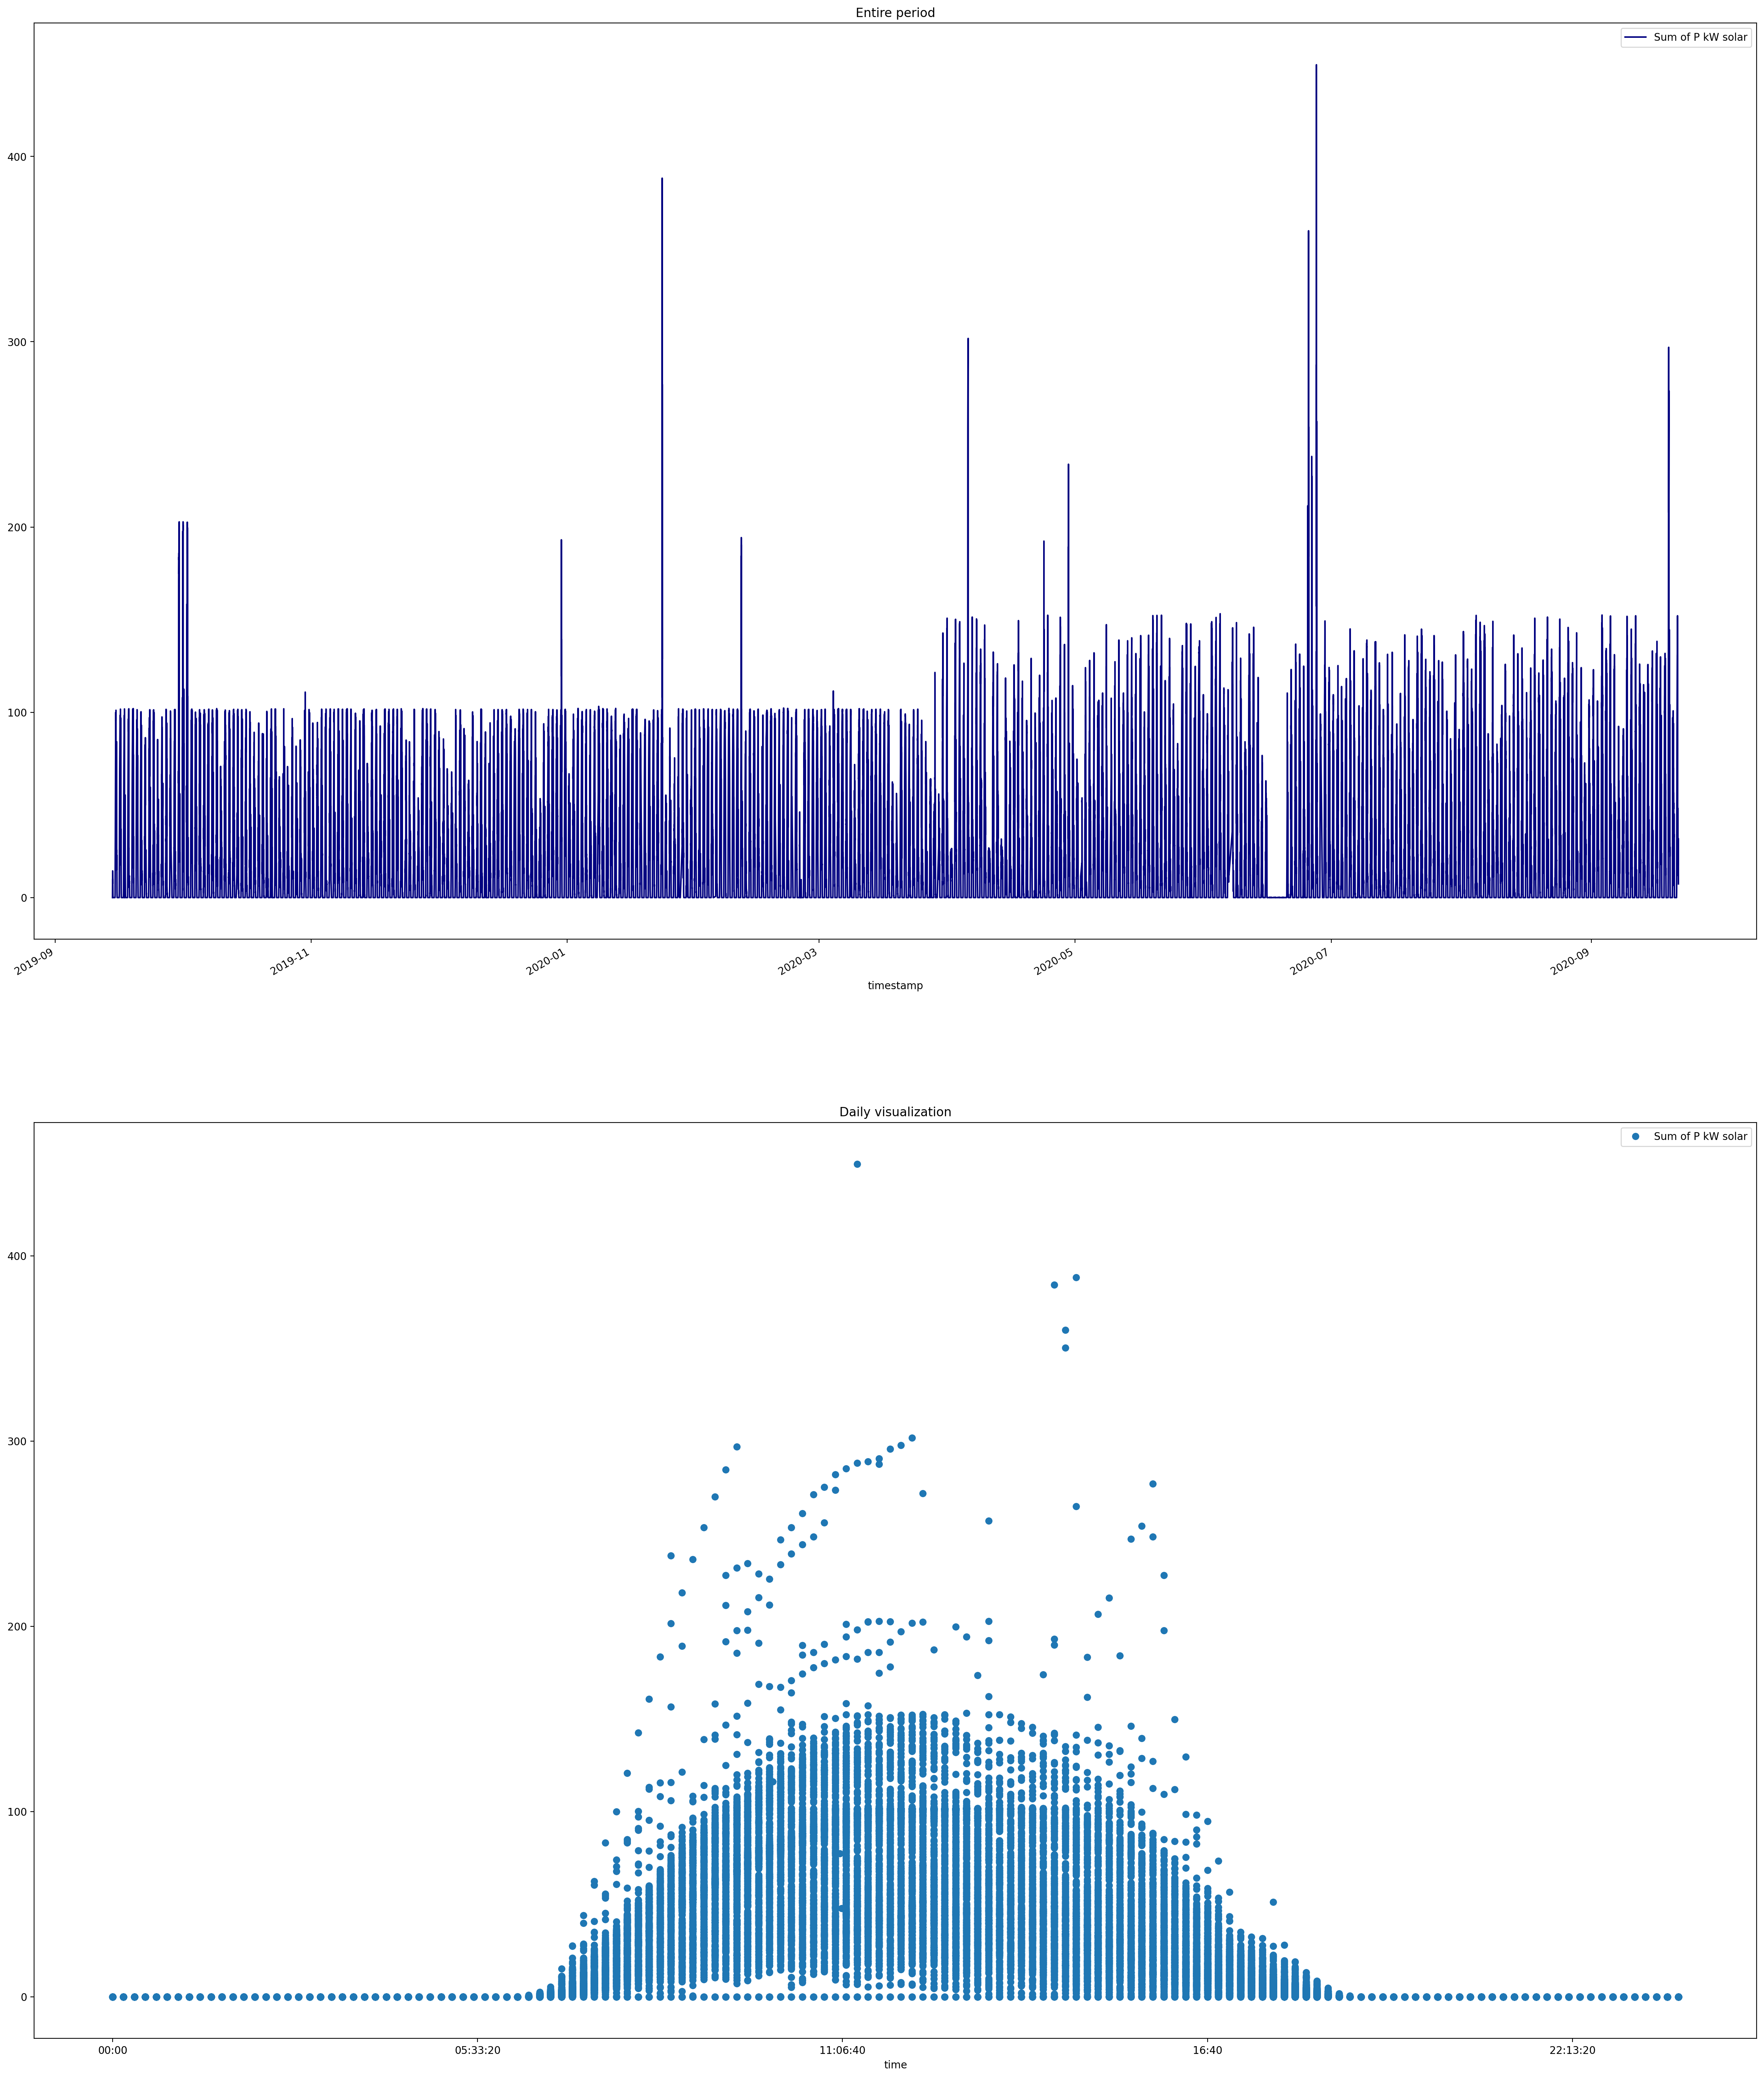

In [10]:
raw_df = raw_data.groupby('timestamp').sum().reset_index()
raw_df['time'] = raw_df['timestamp'].dt.time

fix,ax = plt.subplots(ncols=1,nrows=2,dpi=200, figsize=(30,40))
#Sum of P kW Solar
raw_df.plot(x = 'timestamp',y='Sum of P kW solar', color='navy', ax=ax[0])

#daily
raw_df.set_index('time').drop('timestamp',1)[['Sum of P kW solar']].plot(style='o', ax=ax[1])

ax[0].set_title('Entire period',)
ax[1].set_title('Daily visualization')
plt.show()


## FORECASTING

In [11]:
from pandas.tseries.offsets import DateOffset
! pip install pmdarima
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

You should consider upgrading via the 'C:\Users\Anarchy\anaconda3\python.exe -m pip install --upgrade pip' command.


In [12]:
pred = raw_data.copy()
pred = pred.groupby('timestamp').sum()
pred = pred['Sum of P kW solar'][-2500:].reset_index()
pred.set_index('timestamp', inplace=True)
pred.head(20)


,Sum of P kW solar
timestamp,
2020-09-04 00:50:00,0.0
2020-09-04 01:00:00,0.0
2020-09-04 01:10:00,0.0
2020-09-04 01:20:00,0.0
2020-09-04 01:30:00,0.0
2020-09-04 01:40:00,0.0
2020-09-04 01:50:00,0.0
2020-09-04 02:00:00,0.0
2020-09-04 02:10:00,0.0


## 1 Testing for Stationarity

In [13]:
result = adfuller(pred['Sum of P kW solar'])
print('ADCF:')
labels = ['ADCF Test statistic','p-value', '#Lags Used','Number of Observations used']

for value, label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <=0.05:
    print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else :
     print("Weak evidence against the null hypothesis, time series has a unit root thus it is non-stationary")
            

ADCF:
ADCF Test statistic : -8.413378970016678
p-value : 2.0747590410331886e-13
#Lags Used : 14
Number of Observations used : 2485
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## 2 Split into train and test

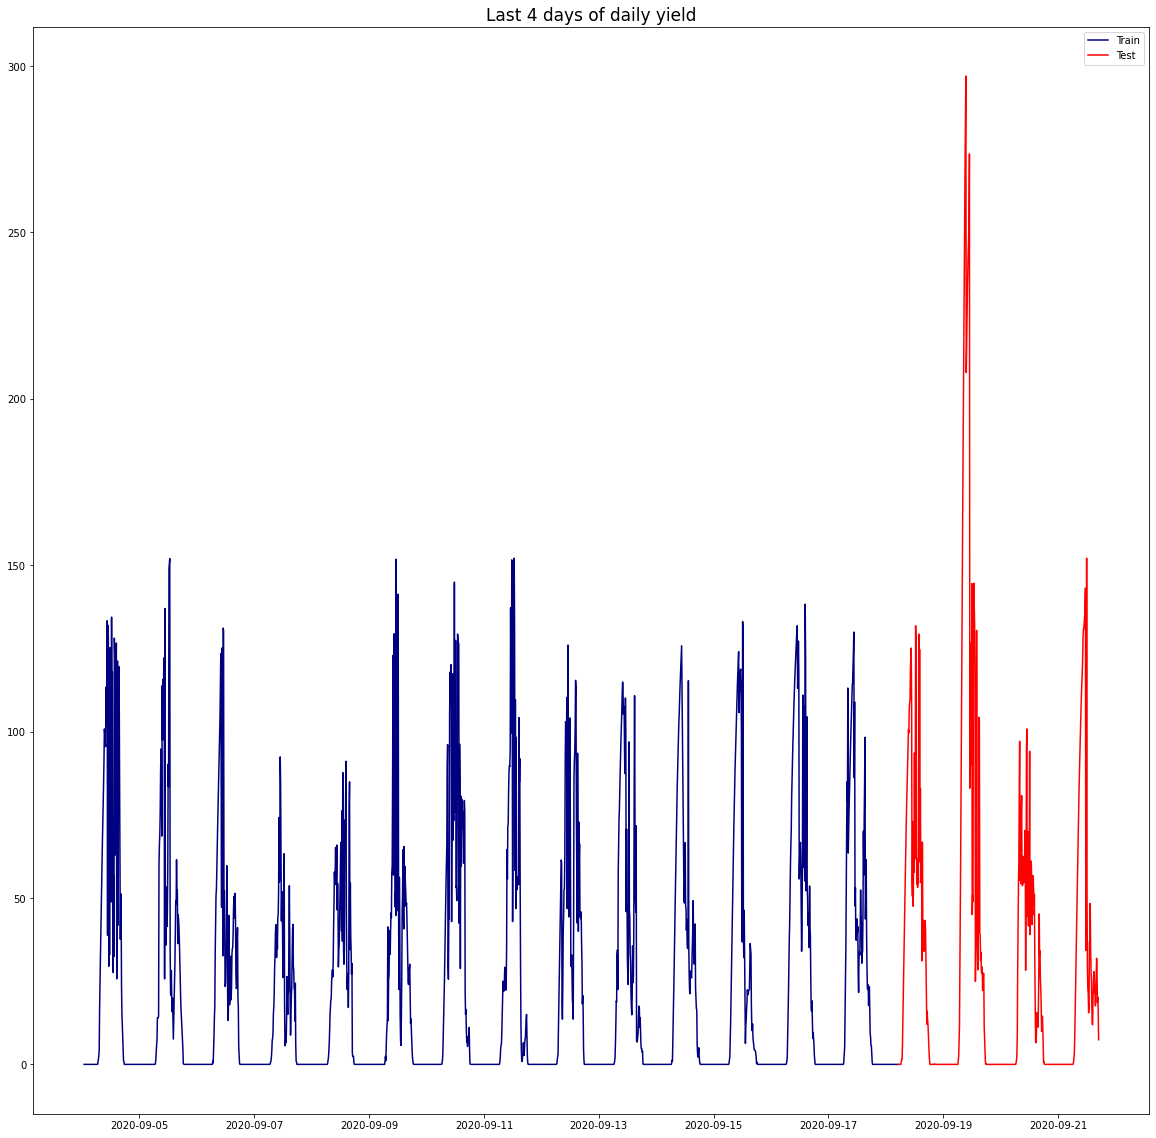

In [14]:
train = pred[:2000]
test = pred[-500:]
plt.figure(figsize=(20,20))
plt.plot(train, label = 'Train', color ='navy')
plt.plot(test, label='Test', color = 'red')
plt.title('Last 4 days of daily yield', fontsize=17)
plt.legend()
plt.show()

## 3 Tune with the auto_arima function

In [15]:
arima_model = auto_arima(train,
                         start_p=0,d=0,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=0,start_Q=0,
                         max_P=4,max_D=4,max_Q=4,m=144,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[144] intercept   : AIC=20015.071, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[144] intercept   : AIC=16870.908, Time=65.43 sec
 ARIMA(0,0,1)(0,0,1)[144] intercept   : AIC=inf, Time=84.68 sec
 ARIMA(0,0,0)(0,0,0)[144]             : AIC=20721.544, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[144] intercept   : AIC=16869.217, Time=0.25 sec
 ARIMA(1,0,0)(0,0,1)[144] intercept   : AIC=16870.931, Time=43.77 sec
 ARIMA(1,0,0)(1,0,1)[144] intercept   : AIC=inf, Time=169.72 sec
 ARIMA(2,0,0)(0,0,0)[144] intercept   : AIC=16732.705, Time=0.48 sec
 ARIMA(2,0,0)(1,0,0)[144] intercept   : AIC=16734.309, Time=104.46 sec
 ARIMA(2,0,0)(0,0,1)[144] intercept   : AIC=16734.309, Time=77.50 sec
 ARIMA(2,0,0)(1,0,1)[144] intercept   : AIC=inf, Time=197.40 sec
 ARIMA(3,0,0)(0,0,0)[144] intercept   : AIC=16648.963, Time=0.93 sec
 ARIMA(3,0,0)(1,0,0)[144] intercept   : AIC=16650.748, Time=135.77 sec
 ARIMA(3,0,0)(0,0,1)[144] intercept   : AIC=16650.750, Time=96.81 

## 4 Modelling

In [16]:
future_dates = [test.index[-1] + DateOffset(minutes=x) for x in range (0,1940, 10) ]

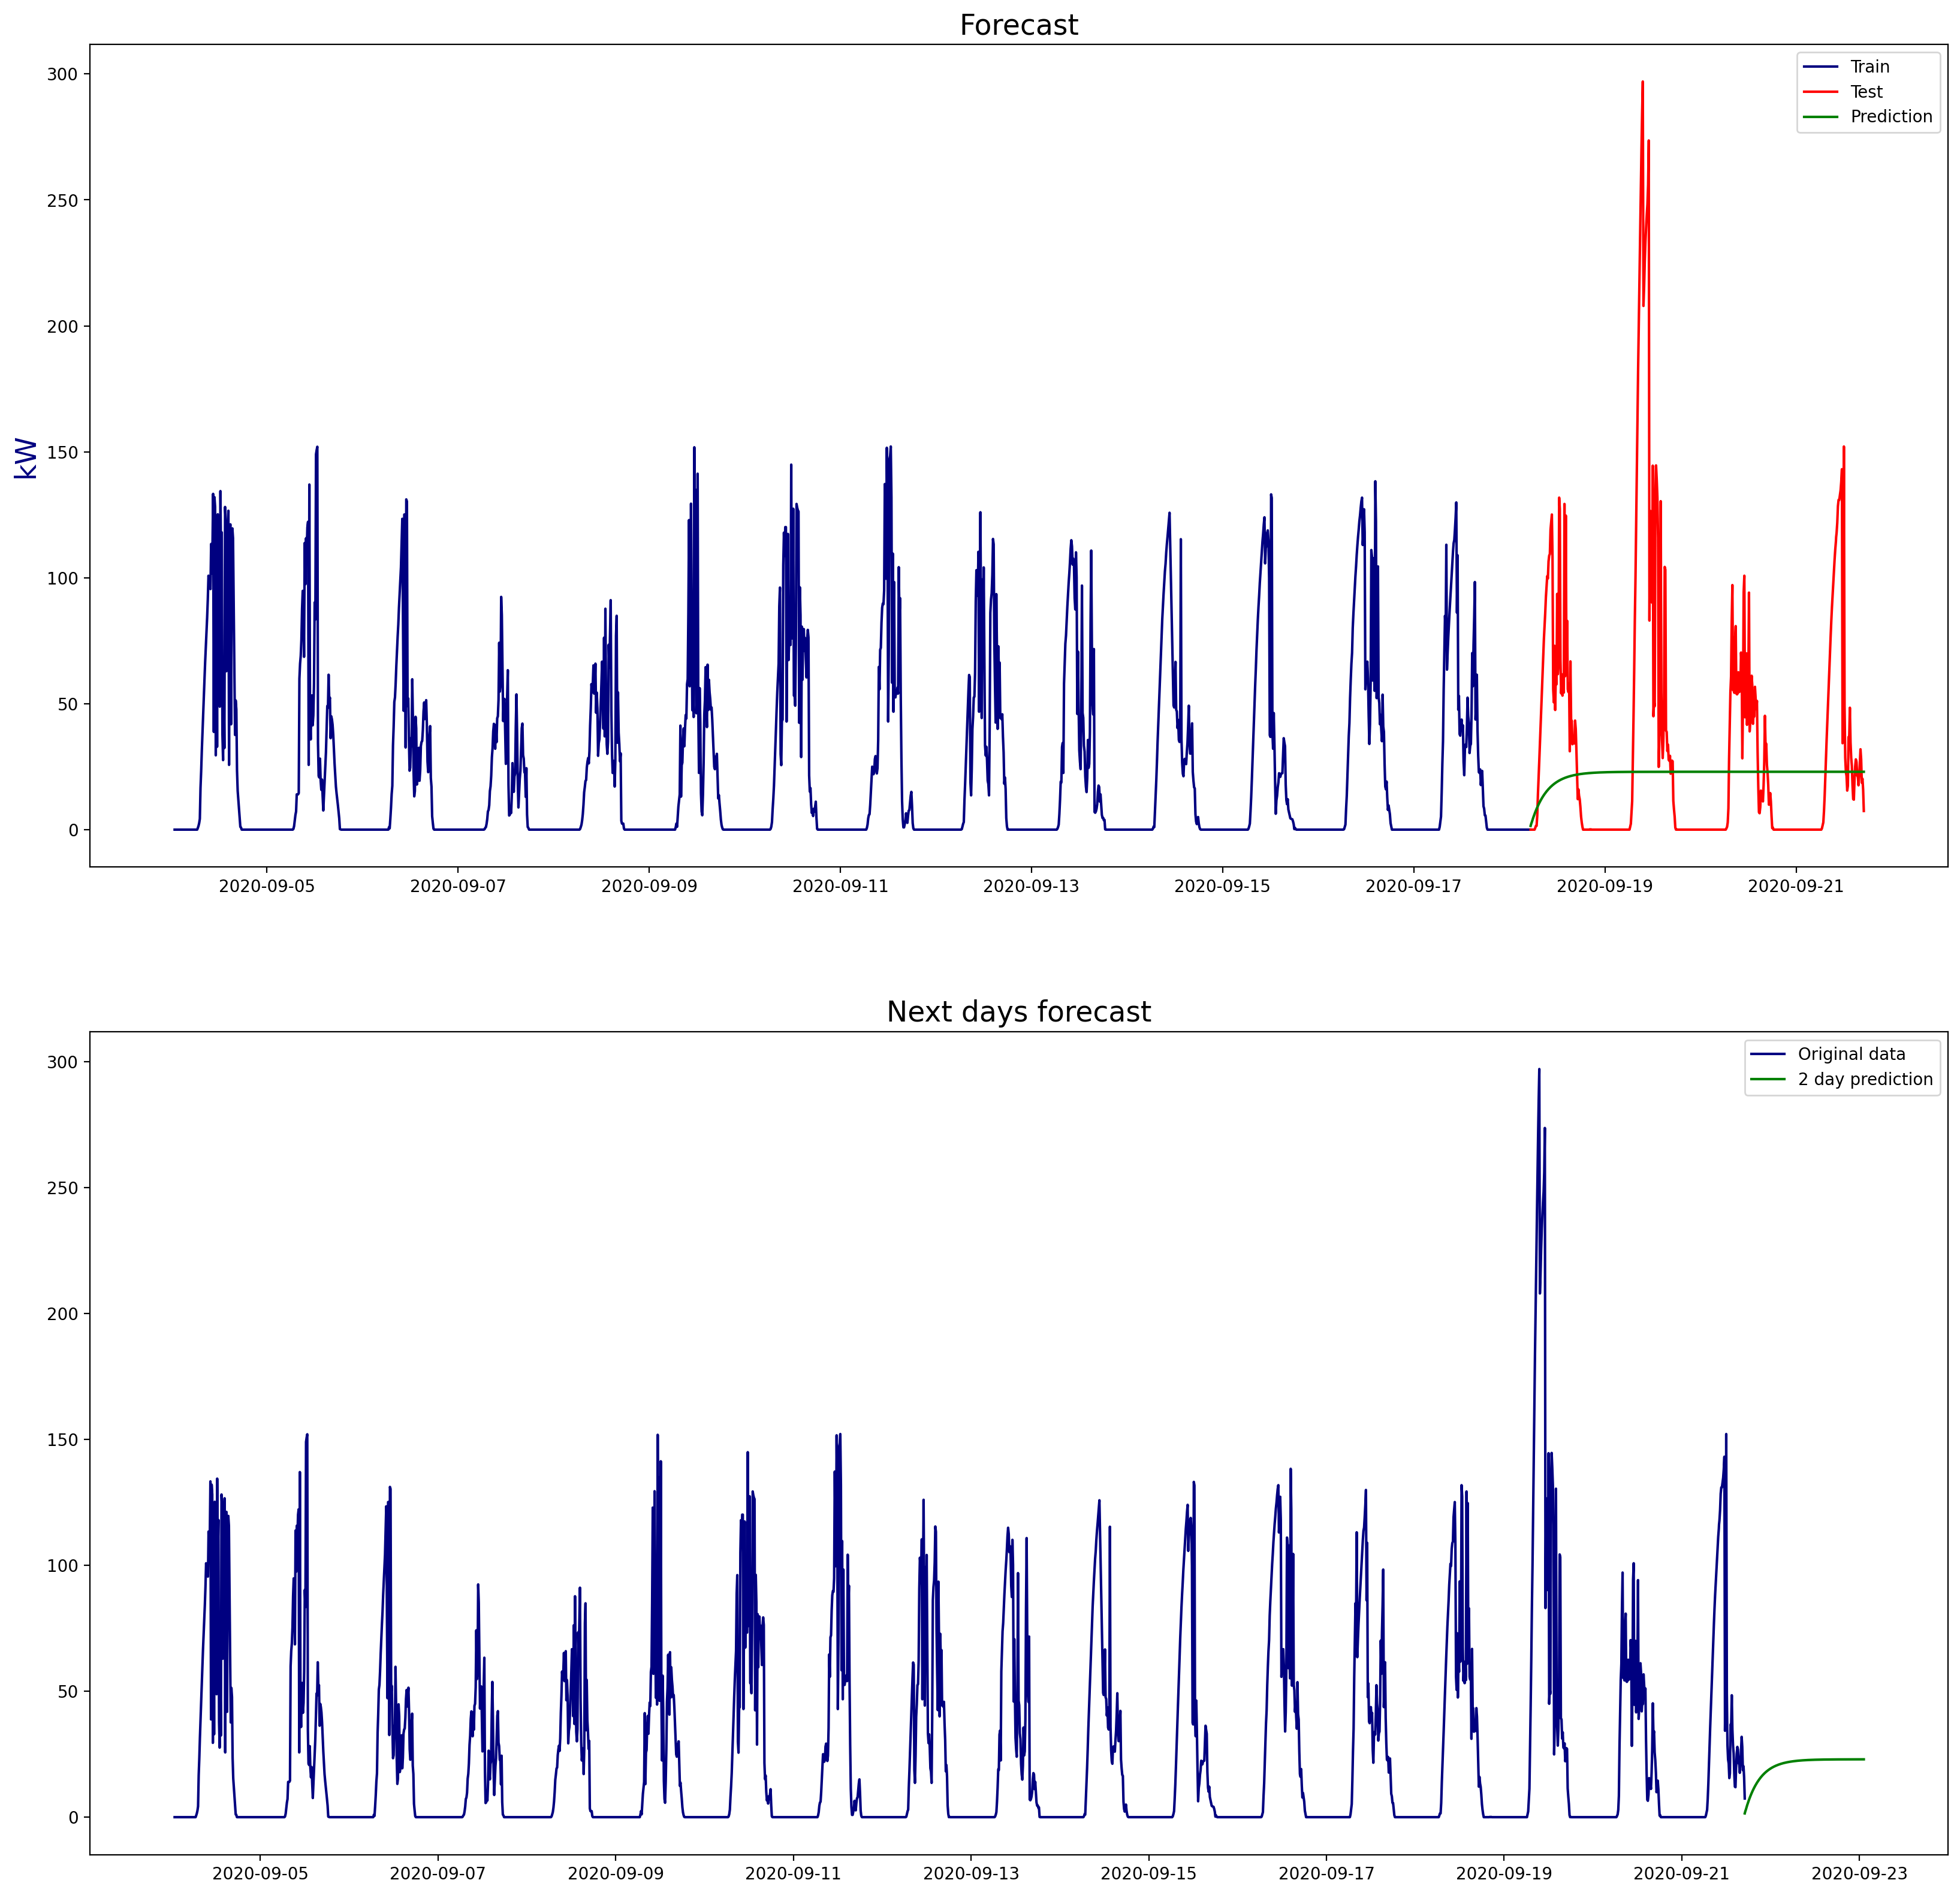

In [17]:
prediction = pd.DataFrame(arima_model.predict(n_periods=500), index = test.index)
prediction.columns = ['predicted_solar']

fig,ax = plt.subplots(ncols=1,nrows=2, dpi=200, figsize=(20,20))
ax[0].plot(train, label = 'Train', color='navy')
ax[0].plot(test, label = 'Test', color='red')
ax[0].plot(prediction, label = 'Prediction', color ='green')
ax[0].legend()
ax[0].set_title('Forecast', size =17)
ax[0].set_ylabel('kW', color = 'navy', fontsize=17)

f_prediction =pd.DataFrame(arima_model.predict(n_periods = 194),index=future_dates)
f_prediction.columns = ['predicted_yield']
ax[1].plot(pred, label='Original data', color = 'navy')
ax[1].plot(f_prediction,label='2 day prediction',color='green')
ax[1].legend()
ax[1].set_title('Next days forecast',size=17)
plt.show()



In [18]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -8319.481
Date:                Wed, 04 May 2022   AIC                          16648.963
Time:                        12:11:28   BIC                          16676.967
Sample:                             0   HQIC                         16659.245
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4911      1.177      1.266      0.205      -0.817       3.799
ar.L1          0.6068      0.013     45.749      0.000       0.581       0.633
ar.L2          0.1235      0.011     10.828      0.000       0.101       0.146
ar.L3          0.2048      0.010     20.447      0.000       0.185       0.224
sigma2       240.0191      4.204     57.096      0.000     231.780     248.258
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11649.30
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""